In [10]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%pylab inline
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [12]:
#import germline data from Huang et al. Cell 2018
germline_data = pd.read_csv("data/tcga_PCA_pathVar_integrated_filtered_adjusted.tsv",sep = '\t')
print germline_data.shape
germline_data.head()

(1393, 181)


,bcr_patient_barcode,HUGO_Symbol,cancer,Sample,Start,transcript_name,HGVSg,Genotype,Chromosome,Stop,...,AIM_ethnicity,PCGP,TumorSample,Somatic_Variant_Classification,Somatic_HGVSp,colocalized_somatic_mutation_count,normal_type,LOH_Sig,Allele_Frequency_Plot,Gene_Classification
0,TCGA-PL-A8LX,ABCB11,BRCA,TCGA-PL-A8LX-10A-01D-A41F-09,169842787,ENST00000263817,2:g.169842787_169842788insC,"0/1:36,18:54:99:511,0,1139",2,169842788,...,afr,False,NaN,NaN,NaN,0,0,Suggestive,0.009554,None
1,TCGA-FX-A3NJ,ABCB11,SARC,TCGA-FX-A3NJ-10A-01D-A21Q-09,169792766,ENST00000263817,2:g.169792766_169792767insATCTC,"0/1:14,14:28:99:576,0,811",2,169792767,...,eur,False,NaN,NaN,NaN,0,0,None,0.009554,None
2,TCGA-KK-A6E1,ABCB11,PRAD,TCGA-KK-A6E1-11A-21D-A30X-08,169825904,ENST00000263817,2:g.169825904_169825905delAA,"0/1:16,13:29:99:498,0,673",2,169825905,...,eur,False,NaN,NaN,NaN,0,1,None,0.009554,None
3,TCGA-RC-A7SB,ABCB11,LIHC,TCGA-RC-A7SB-10A-01D-A34Z-10,169787318,ENST00000263817,2:g.169787318G>A,"0/1:14,12:26:99:312,0,404",2,169787318,...,asian,False,NaN,NaN,NaN,0,0,None,0.009554,None
4,TCGA-AC-A3TM,ALK,BRCA,TCGA-AC-A3TM-10A-01D-A22A-09,29519845,ENST00000389048,2:g.29519845C>A,"0/1:16,11:27:99:263,0,519",2,29519845,...,eur,False,NaN,NaN,NaN,0,0,None,0.009554,Oncogene


In [13]:
germline_data[(germline_data['HUGO_Symbol']=='MLH1') &
             (germline_data['cancer']=='COAD')]

,bcr_patient_barcode,HUGO_Symbol,cancer,Sample,Start,transcript_name,HGVSg,Genotype,Chromosome,Stop,...,AIM_ethnicity,PCGP,TumorSample,Somatic_Variant_Classification,Somatic_HGVSp,colocalized_somatic_mutation_count,normal_type,LOH_Sig,Allele_Frequency_Plot,Gene_Classification
836,TCGA-D5-6927,MLH1,COAD,TCGA-D5-6927-10A-01D-1924-10,37090476,ENST00000231790,3:g.37090476_37090477insT,"0/1:44,21:65:99:589,0,1439",3,37090477,...,eur,False,NaN,NaN,NaN,0,0,Significant,0.009554,TSG
842,TCGA-CM-6674,MLH1,COAD,TCGA-CM-6674-10A-01D-1835-10,37053589,ENST00000231790,3:g.37053589C>T,"0/1:50,55:105:99:1566,0,981",3,37053589,...,eur,False,TCGA-CM-6674-01A-11D-1835-10,Frame_Shift_Del,p.R265Vfs*3,0,0,None,0.009554,TSG


In [14]:
variant_stratification = pd.read_csv("data/tcga_penetrance_by_gene.txt",
                                      sep = '\t')
dict_penetrance = dict(zip(variant_stratification['Hugo_Symbol'], variant_stratification['Gene.level.penetrance']))
hi_pen_genes = variant_stratification[variant_stratification['Gene.level.penetrance']=='High']['Hugo_Symbol'].unique().tolist()
print sorted(hi_pen_genes)
print len(hi_pen_genes)


['APC', 'BAP1', 'BMPR1A', 'BRCA1', 'BRCA2', 'CDH1', 'CDKN2A', 'DICER1', 'FH', 'FLCN', 'KIT', 'MEN1', 'MET', 'MLH1', 'MSH2', 'MSH6', 'NF1', 'PALB2', 'PMS2', 'PTCH1', 'PTEN', 'RB1', 'RET', 'RUNX1', 'SDHA', 'SDHAF2', 'SDHB', 'SDHC', 'SDHD', 'SMARCA4', 'SMARCB1', 'STK11', 'SUFU', 'TMEM127', 'TP53', 'TSC1', 'TSC2', 'VHL']
38


In [15]:
#DNA methylation data from Sanchez-Vega et al 2018 
epigenetic_data_oncogenes = pd.read_csv("data/tcga_epigenetic_data_oncogenes.txt",
                               sep = '\t')
epigenetic_data_oncogenes = pd.melt(epigenetic_data_oncogenes, id_vars = 'SAMPLE_BARCODE', var_name = 'Hugo_Symbol' )
epigenetic_data_oncogenes['bcr_patient_barcode'] = epigenetic_data_oncogenes['SAMPLE_BARCODE'].str[:-3]
epigenetic_data_oncogenes.columns = [ 'Sample', 'HUGO_Symbol','epigenetic_status', 'bcr_patient_barcode', ]
print epigenetic_data_oncogenes.shape
print epigenetic_data_oncogenes[(epigenetic_data_oncogenes['HUGO_Symbol'].isin(hi_pen_genes)) &
                               (epigenetic_data_oncogenes['epigenetic_status']==1)].shape
epigenetic_data_oncogenes.head()
#epigenetic_data_oncogenes.head()

(1706375, 4)
(9540, 4)


,Sample,HUGO_Symbol,epigenetic_status,bcr_patient_barcode
0,TCGA-OR-A5J1-01,CCND1,0.0,TCGA-OR-A5J1
1,TCGA-OR-A5J2-01,CCND1,0.0,TCGA-OR-A5J2
2,TCGA-OR-A5J3-01,CCND1,0.0,TCGA-OR-A5J3
3,TCGA-OR-A5J5-01,CCND1,0.0,TCGA-OR-A5J5
4,TCGA-OR-A5J6-01,CCND1,0.0,TCGA-OR-A5J6


In [16]:
#DNA methylation data from Knijenburg el al. 2018
epigenetic_data = pd.read_csv("data/tcga_epigenetic_data.txt",sep = '\t')

In [17]:
print germline_data[germline_data['HUGO_Symbol'].isin(hi_pen_genes)].shape
hipen_mut = set(germline_data[germline_data['HUGO_Symbol'].isin(hi_pen_genes)]['HUGO_Symbol'].unique().tolist())
print "\n genes with germline mutations"
print sorted(hipen_mut)
print len(hipen_mut)

(492, 181)

 genes with germline mutations
['APC', 'BAP1', 'BRCA1', 'BRCA2', 'CDH1', 'CDKN2A', 'DICER1', 'FH', 'KIT', 'MEN1', 'MET', 'MLH1', 'MSH2', 'MSH6', 'NF1', 'PALB2', 'PMS2', 'PTCH1', 'PTEN', 'RB1', 'RET', 'SDHA', 'SDHB', 'SDHC', 'SDHD', 'SMARCA4', 'SMARCB1', 'STK11', 'TMEM127', 'TP53', 'TSC1', 'TSC2', 'VHL']
33


In [18]:
#genes investigated 
hipen_ddr = epigenetic_data[epigenetic_data['Hugo_Symbol'].isin(hi_pen_genes)]
print hipen_ddr['Hugo_Symbol'].unique().tolist()
print len(hipen_ddr['Hugo_Symbol'].unique().tolist())

hipen_onc = epigenetic_data_oncogenes[epigenetic_data_oncogenes['HUGO_Symbol'].isin(hi_pen_genes)]
print hipen_onc['HUGO_Symbol'].unique().tolist()
print len(hipen_onc['HUGO_Symbol'].unique().tolist())
#print sorted(set(hipen_ddr+hipen_onc))
gene_set_epigenetic = sorted(list(set(['BRCA1', 'BRCA2', 'MLH1', 'MSH2', 'MSH6', 'PALB2', 'PMS2', 'PTEN', 'SMARCA4', 'TP53']+
   ['CDKN2A', 'RB1', 'PTEN', 'STK11', 'TSC1', 'TSC2', 'NF1', 'TP53', 'APC',])))

['BRCA1', 'BRCA2', 'MLH1', 'MSH2', 'MSH6', 'PALB2', 'PMS2', 'PTEN', 'SMARCA4', 'TP53']
10
['MET', 'KIT', 'CDKN2A', 'RB1', 'PTEN', 'STK11', 'TSC1', 'TSC2', 'NF1', 'TP53', 'APC', 'RET']
12


In [19]:

epigenetic_melt = pd.melt(epigenetic_data, id_vars = 'Hugo_Symbol', var_name = 'Sample' )
epigenetic_melt['bcr_patient_barcode'] = epigenetic_melt['Sample'].str[:-3]
epigenetic_melt.columns = ['HUGO_Symbol', 'Sample', 'epigenetic_status', 'bcr_patient_barcode', ]
epigenetic_melt.head()

,HUGO_Symbol,Sample,epigenetic_status,bcr_patient_barcode
0,AEN,TCGA-OR-A5J1-01,0.0,TCGA-OR-A5J1
1,ALKBH1,TCGA-OR-A5J1-01,0.0,TCGA-OR-A5J1
2,ALKBH2,TCGA-OR-A5J1-01,0.0,TCGA-OR-A5J1
3,ALKBH3,TCGA-OR-A5J1-01,0.0,TCGA-OR-A5J1
4,APEX1,TCGA-OR-A5J1-01,0.0,TCGA-OR-A5J1


In [20]:
epigenetic_melt_all = pd.concat([epigenetic_melt, epigenetic_data_oncogenes])
epigenetic_melt_all = epigenetic_melt_all[epigenetic_melt_all['HUGO_Symbol'].isin(gene_set_epigenetic)]
epigenetic_melt_all = epigenetic_melt_all.sort_values(by = ['bcr_patient_barcode', 'HUGO_Symbol', 'epigenetic_status'],
                                                     ascending = [True, True, False])
epigenetic_melt_all = epigenetic_melt_all.drop_duplicates(subset = ['bcr_patient_barcode', 'HUGO_Symbol', 'Sample'])
epigenetic_melt_all.shape

(155125, 4)

In [21]:
cancer_type_map = pd.read_csv("data/tcga_samples_tumortypes.txt",
                               sep = '\t')
dict_cancertype = dict(zip(cancer_type_map['Sample'], cancer_type_map['Tumor type']))
epigenetic_melt_all['tumortype'] = epigenetic_melt_all['Sample'].map(dict_cancertype)
cancer_type_map.head()

,Sample,Tumor type
0,TCGA-OR-A5J1-01,ACC
1,TCGA-OR-A5J2-01,ACC
2,TCGA-OR-A5J3-01,ACC
3,TCGA-OR-A5J5-01,ACC
4,TCGA-OR-A5J6-01,ACC


In [22]:
print epigenetic_melt_all[(epigenetic_melt_all['epigenetic_status']==1)].shape
print germline_data[germline_data['HUGO_Symbol'].isin(gene_set_epigenetic)].shape

(9531, 5)
(390, 181)


In [23]:
#merge epigenetc, germline
germline_data = germline_data[germline_data['HUGO_Symbol'].isin(gene_set_epigenetic)]
epigenetic_germline_merge = pd.merge(germline_data[['bcr_patient_barcode','HUGO_Symbol','HGVSc', 'LOH_Sig', 'cancer']] 
                                                    , epigenetic_melt_all, on = ['HUGO_Symbol', 'bcr_patient_barcode'],
                              how = 'outer')

print epigenetic_germline_merge.shape
epigenetic_germline_merge.head()

(155207, 8)


,bcr_patient_barcode,HUGO_Symbol,HGVSc,LOH_Sig,cancer,Sample,epigenetic_status,tumortype
0,TCGA-B6-A0IJ,APC,ENST00000457016:c.delT,Suggestive,BRCA,TCGA-B6-A0IJ-01,0.0,BRCA
1,TCGA-F5-6814,APC,ENST00000457016:c.586T>A,None,READ,TCGA-F5-6814-01,1.0,READ
2,TCGA-QQ-A8VD,APC,ENST00000457016:c.6202_6205delCAGA,None,SARC,TCGA-QQ-A8VD-01,0.0,SARC
3,TCGA-BR-4184,APC,ENST00000457016:c.450C>T,None,STAD,NaN,NaN,NaN
4,TCGA-Z4-A8JB,APC,ENST00000457016:c.5014C>A,None,SARC,TCGA-Z4-A8JB-01,1.0,SARC


In [24]:
# remove cases where we have germline data but no epigenetic status.
epigenetic_germline_merge_common = epigenetic_germline_merge[~(pd.isnull(epigenetic_germline_merge['Sample']))]
print epigenetic_germline_merge_common.shape

summary = pd.DataFrame({
       'germline' : 
        epigenetic_germline_merge_common[~(pd.isnull(epigenetic_germline_merge_common['HGVSc']))].groupby(['HUGO_Symbol', 'tumortype'])['bcr_patient_barcode'].nunique(),
       'epigenetic' : 
        epigenetic_germline_merge_common[epigenetic_germline_merge_common['epigenetic_status']==1].groupby(['HUGO_Symbol', 'tumortype'])['bcr_patient_barcode'].nunique(),
       'both' : 
        epigenetic_germline_merge_common[(epigenetic_germline_merge_common['epigenetic_status']==1) &
                                        (~(pd.isnull(epigenetic_germline_merge_common['HGVSc'])))].groupby(['HUGO_Symbol', 'tumortype'])['bcr_patient_barcode'].nunique(),
       'neither' : 
        epigenetic_germline_merge_common[(epigenetic_germline_merge_common['epigenetic_status']==0) &
                                        (pd.isnull(epigenetic_germline_merge_common['HGVSc']))].groupby(['HUGO_Symbol', 'tumortype'])['bcr_patient_barcode'].nunique(),
       
    }).reset_index()
summary = summary.fillna(0)
#summary[(summary['HUGO_Symbol']=='BRCA1') & (summary['tumortype']=='OV')]
summary[(summary['HUGO_Symbol'].isin(['BRCA1', 'MLH1'])) &
     (summary['tumortype'].isin(['OV', 'COAD', 'UCEC', 'STAD']))]

(155127, 8)


,HUGO_Symbol,tumortype,both,epigenetic,germline,neither
38,BRCA1,COAD,0.0,0.0,1.0,340
52,BRCA1,OV,0.0,19.0,17.0,141
59,BRCA1,STAD,0.0,3.0,4.0,376
63,BRCA1,UCEC,0.0,4.0,3.0,500
137,MLH1,COAD,0.0,50.0,2.0,289
151,MLH1,OV,0.0,0.0,0.0,177
158,MLH1,STAD,1.0,67.0,1.0,316
162,MLH1,UCEC,0.0,136.0,0.0,371


In [25]:
germline_data_merge = epigenetic_germline_merge_common[~(pd.isnull(epigenetic_germline_merge_common['HGVSc']))]
print germline_data_merge.shape

(310, 8)


In [26]:
print germline_data_merge['LOH_Sig'].unique().tolist()
germline_data_merge['biallelic_status'] = np.where(germline_data_merge['LOH_Sig']=='Significant',
                                                      "LOH", "None")
germline_data_merge['biallelic_status'] = np.where(germline_data_merge['epigenetic_status']==1,
                                                      "epigenetic", #
                                                       "Het/Other")
                                                       #germline_data_merge['biallelic_status'])
count_type = pd.DataFrame({
        'count' : 
        germline_data_merge.groupby(['HUGO_Symbol', 'biallelic_status'])['bcr_patient_barcode'].nunique(), 
       
    }).reset_index()

count_type = count_type.pivot(index = 'HUGO_Symbol', columns = 'biallelic_status', values = 'count')
count_type = count_type.fillna(0)
count_type = count_type[['Het/Other', 'epigenetic']]
#count_type = count_type[['LOH', 'epigenetic', 'None']]

count_type.head()

['Suggestive', 'None', 'Significant']


biallelic_status,Het/Other,epigenetic
HUGO_Symbol,,
APC,2.0,2.0
BRCA1,81.0,0.0
BRCA2,87.0,0.0
CDKN2A,8.0,2.0
MLH1,6.0,1.0


Text(0.5,1,'Zygosity of germline mutations in High penetrance genes')

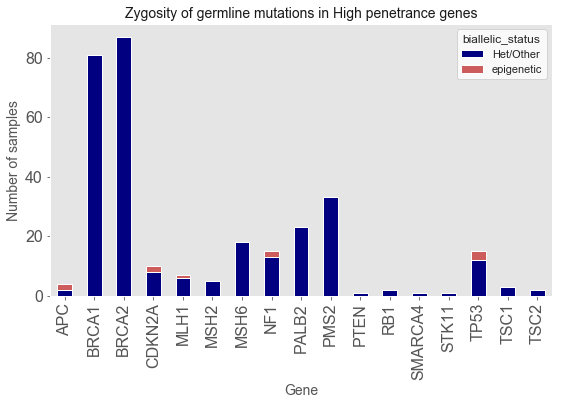

In [27]:
f, ax = plt.subplots(figsize=(9,5))
colors = {'LOH': 'navy', 'Het/Other': 'navy', 'epigenetic': 'indianred',  'None':'grey'}

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.set(style="white")
#count_type = count_type[count_type.index.isin(list(hipen_mut.intersection(hipen_epi)))]
count_type.plot.bar(ax=ax, stacked=True, fontsize=16, color = [colors[i] for i in count_type.columns.tolist()] )
ax.set_ylabel("Number of samples", fontsize=14)
ax.set_xlabel("Gene", fontsize=14)
ax.set_title("Zygosity of germline mutations in High penetrance genes", fontsize=14)

In [28]:
#below is original TCGA file subsetted out to genes in list above.
#EBPlusPlusAdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.tsv from https://gdc.cancer.gov/about-data/publications/pancanatlas)

tcga_expression_data = pd.read_csv("data/tcga_gene_expression_subset.txt",
                                    sep = '\t')
tcga_expression_data['HUGO_Symbol'] = tcga_expression_data['gene_id'].str.split("|").str.get(0)
tcga_expression_data.head()

,gene_id,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J6-01A-31R-A29S-07,TCGA-OR-A5J7-01A-11R-A29S-07,TCGA-OR-A5J8-01A-11R-A29S-07,TCGA-OR-A5J9-01A-11R-A29S-07,TCGA-OR-A5JA-01A-11R-A29S-07,...,TCGA-CG-4462-01A-01R-1157-13,TCGA-CG-4465-01A-01R-1157-13,TCGA-CG-4466-01A-01R-1157-13,TCGA-CG-4469-01A-01R-1157-13,TCGA-CG-4472-01A-01R-1157-13,TCGA-CG-4474-01A-02R-1157-13,TCGA-CG-4475-01A-01R-1157-13,TCGA-CG-4476-01A-01R-1157-13,TCGA-CG-4477-01A-01R-1157-13,HUGO_Symbol
0,APC|324,638.3280,1830.360,797.5110,1795.5100,914.2890,1275.9700,397.431,1222.2300,1176.530,...,1166.963266,1130.613794,561.758120,1229.418004,1299.466247,1081.888626,1112.329586,1159.769851,572.414682,APC
1,BAP1|8314,3104.2300,5964.970,2914.5300,2270.3300,2959.7000,7223.4300,2289.270,2133.7200,2234.140,...,1388.884311,1079.706545,1003.411330,1114.974344,1010.601524,1240.239648,1374.977455,1025.582659,1460.661631,BAP1
2,BMPR1A|657,791.5470,852.771,243.5190,398.1410,375.5520,473.3250,460.423,938.3450,347.252,...,511.173484,509.014498,350.552595,623.611433,846.797292,537.323991,662.205884,989.390992,670.690702,BMPR1A
3,BRCA1|672,40.3458,177.560,47.9929,137.8780,43.5908,135.9810,411.106,87.3749,228.858,...,213.685507,871.840008,1331.097673,1242.695463,231.268542,497.511479,819.153386,555.966830,923.587078,BRCA1
4,BRCA2|675,15.8501,29.392,31.9953,30.9837,8.3829,63.7786,95.317,31.2782,155.920,...,142.843169,466.878100,527.251401,569.475991,176.632683,357.382838,313.498488,373.738448,560.554190,BRCA2


In [29]:
tcga_expression_data.index = tcga_expression_data['gene_id']
tcga_expression_data_transpose = tcga_expression_data.drop('gene_id', axis = 1).transpose()
tcga_expression_data_transpose['sample'] = tcga_expression_data_transpose.index.str[:15] 
tcga_expression_data_transpose['cancer'] = tcga_expression_data_transpose['sample'].map(dict_cancertype)
#tcga_expression_data_transpose.head()

In [30]:
#compute z-scores by tumor type

genes = tcga_expression_data_transpose.columns.tolist()[:-2]
from sklearn.preprocessing import StandardScaler

def normalize_by_group(df, types, cols):
    df_out = pd.DataFrame(columns = cols)
    for cancer_type in types:
        df_group = df[df['cancer']==cancer_type]
        df_group = df_group[cols]
        scaler = StandardScaler()
        df_group[cols] = scaler.fit_transform(df_group[cols])
        df_out = pd.concat([df_out, df_group])
        #print mean, std
        #df_group_t = df_group
    return df_out

    
tcga_expression_data_transpose = tcga_expression_data_transpose[~(pd.isnull(tcga_expression_data_transpose['cancer']))]
print tcga_expression_data_transpose.shape
cancertypes = tcga_expression_data_transpose['cancer'].unique().tolist()
norm_expression_data = normalize_by_group(tcga_expression_data_transpose,cancertypes, genes )
print norm_expression_data.shape
#norm_expression_data.head()
#tcga_expression_data_transpose.groupby('cancer')[genes].transform(lambda x: (x - x.mean()) / x.std())

(9120, 40)
(9120, 38)


In [31]:
norm_expression_data = norm_expression_data.transpose()#.head()
norm_expression_data['HUGO_Symbol'] = norm_expression_data.index.str.split("|").str.get(0)
tcga_expression_data = pd.melt(norm_expression_data, id_vars = 'HUGO_Symbol', var_name = 'Sample' )

tcga_expression_data.head()

,HUGO_Symbol,Sample,value
0,APC,TCGA-OR-A5J1-01A-11R-A29S-07,-0.752097
1,BAP1,TCGA-OR-A5J1-01A-11R-A29S-07,0.377107
2,BMPR1A,TCGA-OR-A5J1-01A-11R-A29S-07,1.626670
3,BRCA1,TCGA-OR-A5J1-01A-11R-A29S-07,-0.785583
4,BRCA2,TCGA-OR-A5J1-01A-11R-A29S-07,-0.665895


In [32]:
patient_list = germline_data_merge['bcr_patient_barcode'].unique().tolist()
print patient_list[:5]
tcga_expression_data['bcr_patient_barcode'] = tcga_expression_data['Sample'].str[:12] 
tcga_expression_data_sub = tcga_expression_data[tcga_expression_data['bcr_patient_barcode'].isin(patient_list)]
print tcga_expression_data_sub.shape
tcga_expression_data_sub.columns = ['HUGO_Symbol', 'Sample_exp', 'Gene_exp', 'bcr_patient_barcode']
tcga_expression_data_sub.head()

['TCGA-B6-A0IJ', 'TCGA-F5-6814', 'TCGA-QQ-A8VD', 'TCGA-Z4-A8JB', 'TCGA-78-7147']
(11476, 4)


,HUGO_Symbol,Sample_exp,Gene_exp,bcr_patient_barcode
190,APC,TCGA-OR-A5J7-01A-11R-A29S-07,-0.091531,TCGA-OR-A5J7
191,BAP1,TCGA-OR-A5J7-01A-11R-A29S-07,3.910226,TCGA-OR-A5J7
192,BMPR1A,TCGA-OR-A5J7-01A-11R-A29S-07,0.045034,TCGA-OR-A5J7
193,BRCA1,TCGA-OR-A5J7-01A-11R-A29S-07,-0.049899,TCGA-OR-A5J7
194,BRCA2,TCGA-OR-A5J7-01A-11R-A29S-07,0.269702,TCGA-OR-A5J7


In [33]:
germline_data_merge_exp = pd.merge(germline_data_merge, tcga_expression_data_sub, on = ['HUGO_Symbol', 'bcr_patient_barcode'],
                              how = 'left')
#germline_data_merge_exp.head()

79 221 10
0.020053724618430354
0.29608615815547656
0.017669276136222902


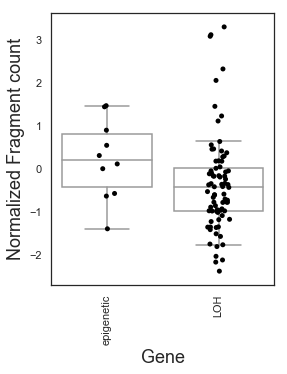

In [34]:
germline_data_merge_exp['biallelic_status'] = np.where(germline_data_merge_exp['LOH_Sig']=='Significant',
                                                      "LOH", "None")
germline_data_merge_exp['biallelic_status'] = np.where(germline_data_merge_exp['epigenetic_status']==1,
                                                      "epigenetic", #
                                                       germline_data_merge_exp['biallelic_status'])
    

f, ax = plt.subplots(figsize=(4,5))
df_plot = germline_data_merge_exp[['bcr_patient_barcode', 'HUGO_Symbol', 'Gene_exp', 'biallelic_status']]#[~(germline_data_merge_exp['biallelic_status']=='None')]
df_plot = df_plot[~(pd.isnull(df_plot['Gene_exp']))]


sns.boxplot(ax = ax, data = df_plot[~(df_plot['biallelic_status']=='None')],# hue = 'biallelic_status',
              x = 'biallelic_status', y = 'Gene_exp', color = 'white', showfliers = False, #size = 10,
            whis = 0.8, #notch = True
            )
sns.stripplot(ax = ax, data = df_plot[~(df_plot['biallelic_status']=='None')],# hue = 'biallelic_status',
              x = 'biallelic_status', y = 'Gene_exp', color = 'black',#size = 10,
           )
plt.xticks(rotation=90)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.95))
ax.set_ylabel("Normalized Fragment count", fontsize=18)
ax.set_xlabel("Gene", fontsize=18)

from scipy.stats import ttest_ind, ttest_ind_from_stats, mannwhitneyu
from scipy.stats import norm
list_biallelic = df_plot[(df_plot['biallelic_status']=='LOH') ]['Gene_exp'].tolist()
list_het = df_plot[(df_plot['biallelic_status']=='None') ]['Gene_exp'].tolist()
list_epigenetic = df_plot[(df_plot['biallelic_status']=='epigenetic') ]['Gene_exp'].tolist()

print len(list_biallelic), len(list_het), len(list_epigenetic)
t, pval = mannwhitneyu(list_biallelic, list_epigenetic, use_continuity = False) #equal_var=False
print  pval

t, pval = mannwhitneyu(list_biallelic, list_het, use_continuity = False)
print  pval    

t, pval = mannwhitneyu(list_epigenetic, list_het, use_continuity = False)
print  pval  
#ax.set(yscale="log")

